### 1.import libraries

In [1]:
# import the libraries that we will use
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the tdt library
import tdt

In [2]:
# get help on the function tdt.read_block()
tdt.read_block?

### 2.import data

In [3]:
block_path = 'C:/Users/YGKim_IBS/Dropbox/00_CHD/Raw data\Fiber Photometry/240320/240320-141617-recordingCHD8_89M_WT/240320-141617-recordingCHD8_89M_WT-partnerPVCreF'
block_path

'C:/Users/YGKim_IBS/Dropbox/00_CHD/Raw data\\Fiber Photometry/240320/240320-141617-recordingCHD8_89M_WT/240320-141617-recordingCHD8_89M_WT-partnerPVCreF'

In [4]:
FPdata = tdt.read_block(block_path)
FPdata

Found Synapse note file: C:/Users/YGKim_IBS/Dropbox/00_CHD/Raw data\Fiber Photometry/240320/240320-141617-recordingCHD8_89M_WT/240320-141617-recordingCHD8_89M_WT-partnerPVCreF\Notes.txt
read from t=0s to t=925.47s


epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])

위의 한 줄 코드로 block 내의 모든 데이터 반입. 반입된 data는 structured object(dictionary type in Python)임.</br>
데이터 크기가 커서 그 중 일부만 반입하는 것도 가능. 자세한 내용은 도움말 참고. </br>
tdt.read_block(PATH_BLOCK).info 명령어로 data에 대한 자세한 정보 확인 가능. 

In [5]:
FPdata.info

tankpath:	'C:\\Users\\YGKim_IBS\\Dropbox\\00_CHD\\Raw data\\Fiber Photometry\\240320\\240320-141617-recordingCHD8_89M_WT'
blockname:	'240320-141617-recordingCHD8_89M_WT-partnerPVCreF'
start_date:	datetime.datetime(2024, 3, 20, 14, 16, 23, 999999)
utc_start_time:	'14:16:23'
stop_date:	datetime.datetime(2024, 3, 20, 14, 31, 49, 469631)
utc_stop_time:	'14:31:49'
duration:	datetime.timedelta(seconds=925, microseconds=469632)
stream_channel:	0
snip_channel:	0
experiment:	'YHG-setting-230404'
subject:	'mouse'
user:	'User'
start:	'2:16:24오후 03/20/2024'
stop:	'2:31:49오후 03/20/2024'

Streams 데이터에 접근

In [17]:
nd_control = FPdata.streams['_405A'].data
nd_signal = FPdata.streams['_465A'].data
nd_control, nd_signal

(array([ 0.5993618 ,  0.5751894 ,  0.54985523, ..., 39.029903  ,
        39.030094  , 39.03053   ], dtype=float32),
 array([ 0.3514677 ,  0.34937948,  0.34693062, ..., 55.538292  ,
        55.5286    , 55.519344  ], dtype=float32))

In [18]:
num_sample = len(nd_control)
num_sample

941312

In [19]:
wav_time = np.linspace(1, num_sample, num_sample)/FPdata.streams['_405A'].fs
wav_time

array([9.83039980e-04, 1.96607996e-03, 2.94911994e-03, ...,
       9.25345364e+02, 9.25346347e+02, 9.25347330e+02])

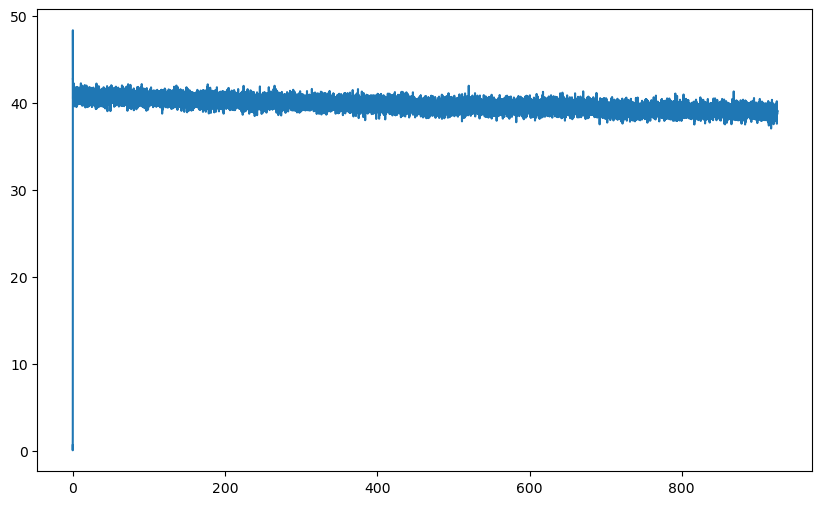

In [21]:
fig_405A = plt.subplots(figsize=(10,6))
plt.plot(wav_time, nd_control)
plt.show()

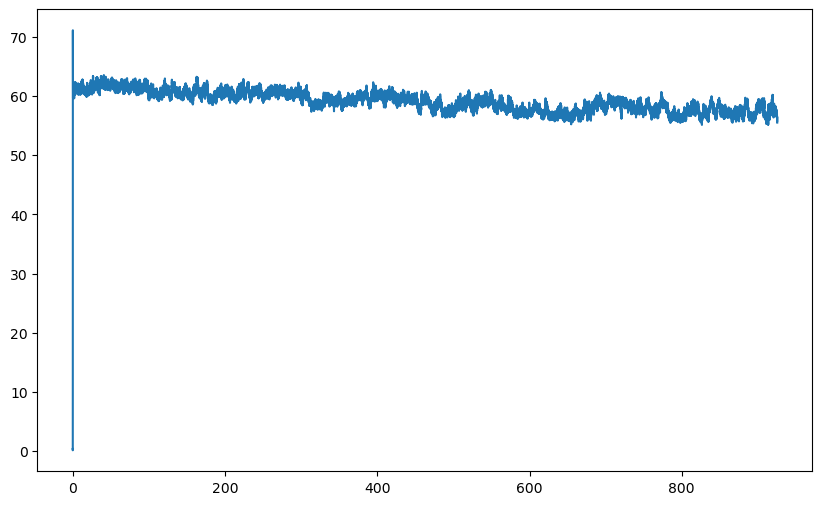

In [22]:
fig_465A = plt.subplots(figsize=(10,6))
plt.plot(wav_time, nd_signal)
plt.show()